# Regression

## Loading data

In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xbg
from sklearn.model_selection import GridSearchCV
import os

In [2]:
regression_data=joblib.load('C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\data\\cleaned_superstore_data.csv')

In [3]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   category      
 4   Customer ID    9994 non-null   object        
 5   Segment        9994 non-null   category      
 6   City           9994 non-null   object        
 7   State          9994 non-null   object        
 8   Region         9994 non-null   category      
 9   Product ID     9994 non-null   object        
 10  Category       9994 non-null   category      
 11  Sub-Category   9994 non-null   category      
 12  Sales          9994 non-null   float64       
 13  Quantity       9994 non-null   int64         
 14  Discount       9994 non-null   float64       
 15  Profit         9994 n

## Feature selection

In [4]:
columns_to_drop=['Order ID','Order Date','Ship Date','Ship Mode','Customer ID','City','Product ID','Year','Month','Day','DayName','Quarter','State','Delivery Days']

regression_data=regression_data.drop(columns_to_drop,axis=1)

In [5]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Segment       9994 non-null   category
 1   Region        9994 non-null   category
 2   Category      9994 non-null   category
 3   Sub-Category  9994 non-null   category
 4   Sales         9994 non-null   float64 
 5   Quantity      9994 non-null   int64   
 6   Discount      9994 non-null   float64 
 7   Profit        9994 non-null   float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 351.7 KB


## EDA

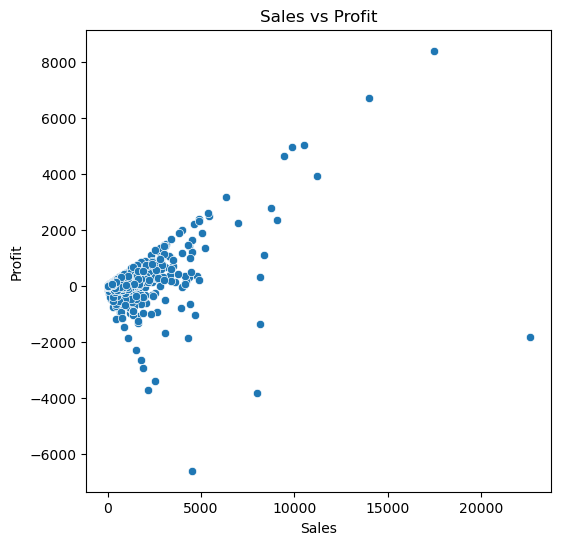

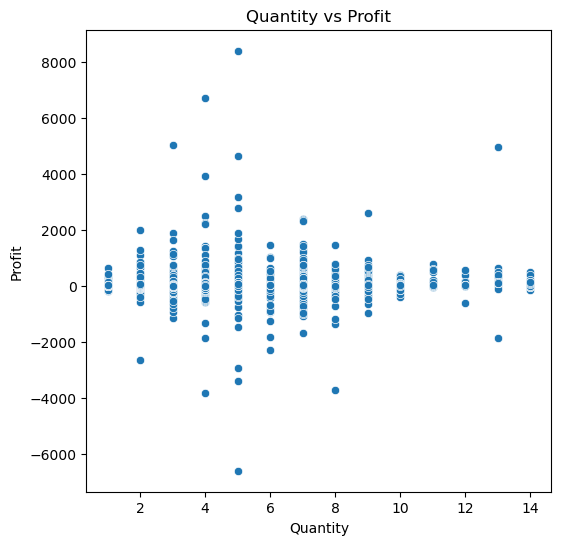

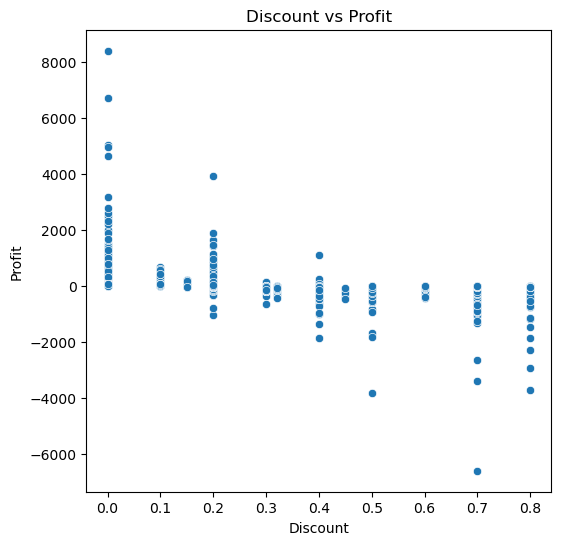

In [6]:
numeric_features=['Sales','Quantity','Discount']

for col in numeric_features:
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=regression_data[col],y=regression_data['Profit'])
    plt.title(f'{col} vs Profit')
    plt.show()

## Encoding categorical features

In [7]:
regression_data=pd.get_dummies(regression_data,drop_first=True)

## Train - Test split

In [8]:
x=regression_data.drop('Profit',axis=1)
y=regression_data['Profit']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model training

In [10]:
#Linear Regression model

lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print(f'Mean Absolute Error:{mae}')
print(f'Mean Squared Error:{mse}')
print(f'Root Mean Squared Error:{rmse}')
print(f'r2 score:{r2}')

Mean Absolute Error:67.70470818898374
Mean Squared Error:79710.60562904141
Root Mean Squared Error:282.3306671777641
r2 score:-0.6440218391511059


In [11]:
# XGBoost model

xgbr = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgbr.fit(x_train,y_train)

y_pred=xgbr.predict(x_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print(f'Mean Absolute Error:{mae}')
print(f'Mean Squared Error:{mse}')
print(f'Root Mean Squared Error:{rmse}')
print(f'r2 score:{r2}')

Mean Absolute Error:19.982116204070813
Mean Squared Error:7923.383077046374
Root Mean Squared Error:89.01338706647654
r2 score:0.8365811586070974


<Figure size 1000x600 with 0 Axes>

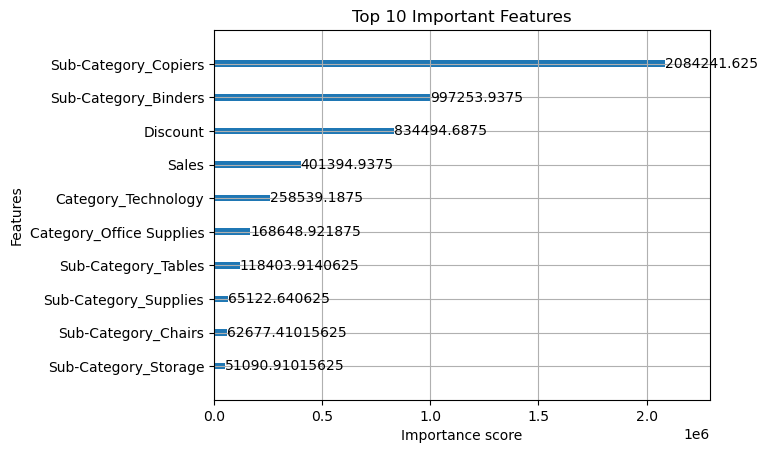

In [32]:
import xgboost as xgb

plt.figure(figsize=(10,6))

xbg.plot_importance(xgbr,max_num_features=10,importance_type='gain')
plt.title("Top 10 Important Features")
plt.show()

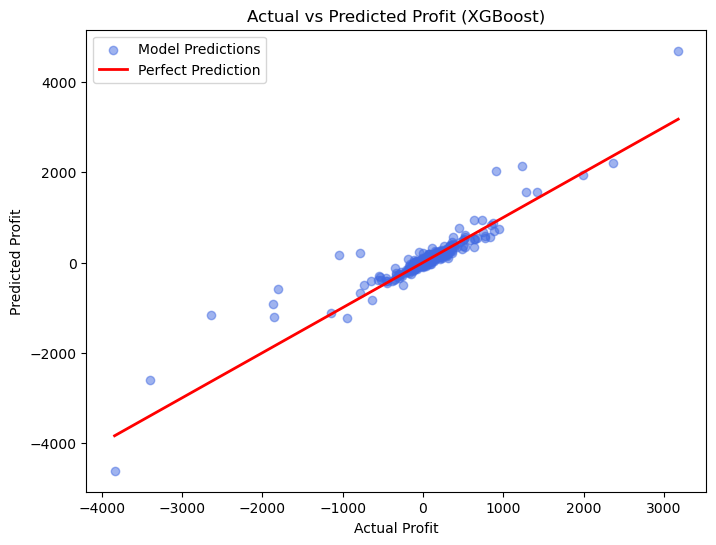

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue',label='Model Predictions')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Perfect Prediction')  # reference line (perfect prediction)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit (XGBoost)")
plt.legend(loc='best')
plt.show()

## Hyperparameter tuning using gridsearchcv

In [13]:
params = {
    'n_estimators':[200,300,400],
    'learning_rate':[0.1,0.001],
    'max_depth':[5,6,7],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

base_model=XGBRegressor(
    random_state=42
)

grid=GridSearchCV(base_model,param_grid=params,scoring='r2',cv=5)

grid.fit(x_train,y_train)

print(grid.best_params_)
print(grid.best_score_)

KeyboardInterrupt: 

In [11]:
# Using the best parameters from grid search

xgbr_best = XGBRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=5,
    subsample=1,
    colsample_bytree=1,
    random_state=42
)

xgbr_best.fit(x_train,y_train)

y_pred_best=xgbr_best.predict(x_test)

## Evaluation and visualization

In [12]:
mae=mean_absolute_error(y_test,y_pred_best)
mse=mean_squared_error(y_test,y_pred_best)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_best)

print(f'Mean Absolute Error:{mae}')
print(f'Mean Squared Error:{mse}')
print(f'Root Mean Squared Error:{rmse}')
print(f'r2 score:{r2}')

Mean Absolute Error:18.73632959577219
Mean Squared Error:6469.872557104451
Root Mean Squared Error:80.43551800731099
r2 score:0.8665596416378396


<Figure size 1000x600 with 0 Axes>

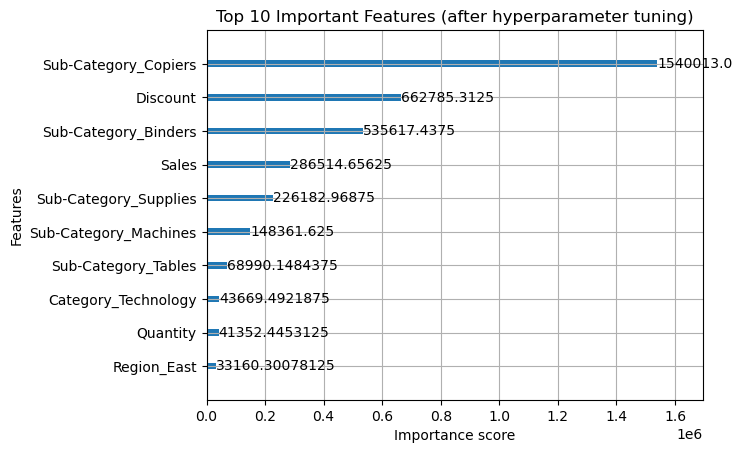

In [13]:
plt.figure(figsize=(10,6))

xbg.plot_importance(xgbr_best,max_num_features=10,importance_type='gain')
plt.title("Top 10 Important Features (after hyperparameter tuning)")

plt.savefig('feature_importance_plot.png', bbox_inches='tight')
plt.show()

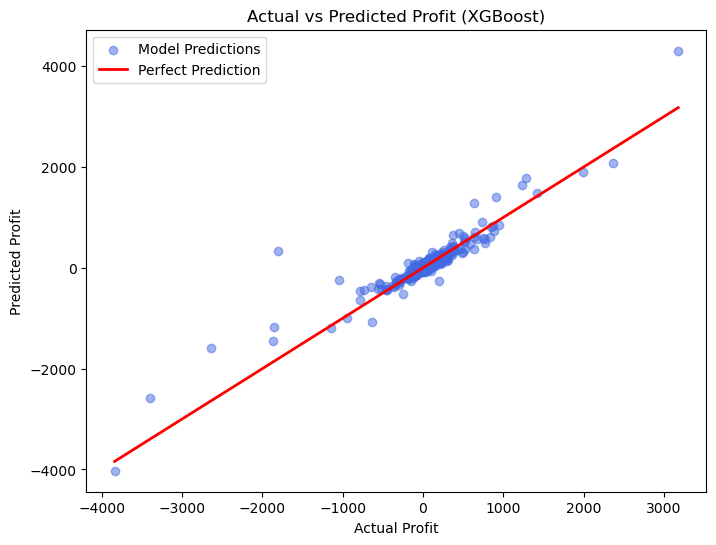

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5, color='royalblue',label='Model Predictions')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Perfect Prediction')  # reference line (perfect prediction)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit (XGBoost)")
plt.legend(loc='best')

plt.savefig('actual_vs_predicted_plot.png', bbox_inches='tight')
plt.show()

## Saving results

### 1.Model

In [38]:
file_name='XGBRegressor.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Regression'
full_path=os.path.join(file_path,file_name)

joblib.dump(xgbr_best,full_path)

['C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\Saved models\\Regression\\XGBRegressor.joblib']

### 2.Best parameters 

In [17]:
best_params=grid.best_params_

file_name='best_params.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Regression'
full_path=os.path.join(file_path,file_name)

joblib.dump(best_params,full_path)

['C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\Saved models\\Regression\\best_params.joblib']

### 3.Model Metrics

In [40]:
metrics = {
    "R2": r2,
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse
}

file_name='model_metrics.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Regression'
full_path=os.path.join(file_path,file_name)

joblib.dump(metrics,full_path)

['C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\Saved models\\Regression\\model_metrics.joblib']

### 4.Feature importance

In [42]:
importance = xgbr.get_booster().get_score(importance_type='gain')

importance_df=pd.DataFrame({
    'Feature':importance.keys(),
    'Importance':importance.values()
}).sort_values(by='Importance',ascending=False)

file_name='feature_importance.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Regression'
full_path=os.path.join(file_path,file_name)

joblib.dump(importance_df,full_path)

['C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\Saved models\\Regression\\feature_importance.joblib']

### 5.Results dataframe

In [17]:
x_test_reset=x_test.reset_index(drop=True)
y_test_reset=y_test.reset_index(drop=True)

results_df=x_test_reset.copy()
results_df['Actual_Profit']=y_test_reset
results_df['Predicted_profit']=y_pred_best
results_df['Error']=results_df['Actual_Profit']-results_df['Predicted_profit']

file_name='results.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Regression'
full_path=os.path.join(file_path,file_name)

joblib.dump(results_df,full_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\Saved models\\Regression\\results.joblib'

## Additional Plots

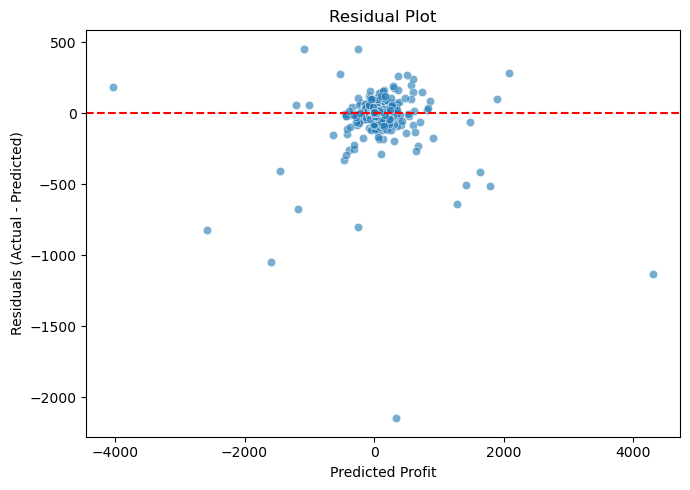

In [18]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=results_df['Predicted_profit'], y=results_df['Error'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals (Actual - Predicted)")
plt.tight_layout()

plt.savefig('residual_plot.png', bbox_inches='tight')
plt.show()

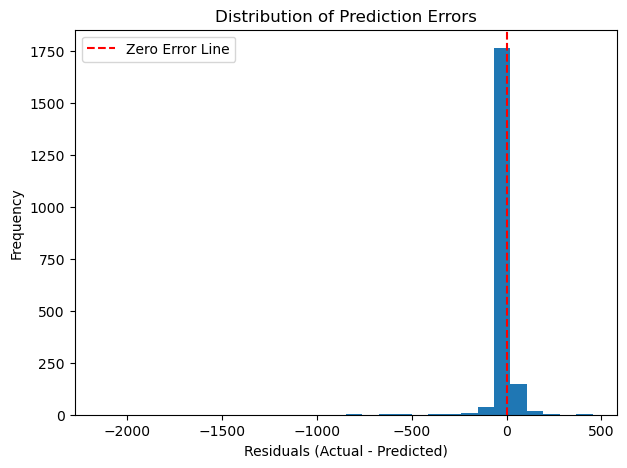

In [19]:
plt.figure(figsize=(7,5))
plt.hist(results_df['Error'],bins=30)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0,color='red',linestyle='--',label='Zero Error Line')
plt.legend()

plt.savefig('error_distribution_plot.png', bbox_inches='tight')
plt.show()